# <p style="background-color:black;font-family:newtimeroman;font-size:200%;color:#E50914;text-align:center;border-radius:20px 20px;"><b>Netflix Data EDA & Data Visualization</b></p>

<div class="netflix-stick">
  <div class="thing">
    
  </div>
</div>

<a id='understanding'></a>
# <p style="background-color:black;font-family:newtimeroman;font-size:150%;color:#E50914;text-align:center;border-radius:20px 20px;"><b>Import Library</b></p>

In [1]:
import numpy as np  
# NumPy is a library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

import pandas as pd  
# Pandas is a powerful data manipulation and analysis library for Python, providing data structures like DataFrame and Series that make working with structured data easy and intuitive.

import matplotlib.pyplot as plt  
# Matplotlib is a plotting library for Python that enables the creation of static, animated, and interactive visualizations in Python.

import seaborn as sns  
# Seaborn is a statistical data visualization library based on Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

import missingno as msno  
# Missingno is a Python library for visualizing missing data in datasets, providing tools to visualize patterns of missingness in datasets.

import plotly.express as px  
# Plotly Express is a high-level interface for creating a variety of interactive plots using Plotly, a graphing library for making interactive, publication-quality graphs.

import folium  
# Folium is a Python library used for creating interactive maps and visualizations using Leaflet.js, a JavaScript library for interactive maps.
from folium import plugins  
# Folium Plugins is an extension for Folium that provides additional functionality, including tools for creating Heatmaps and MarkerClusters in interactive maps.

plt.rcParams["figure.figsize"] = (6,4)  
# Sets the default figure size for Matplotlib plots to (6,4) inches.

import warnings  # Warnings is a Python module that provides a mechanism to issue warning messages in Python code.
warnings.filterwarnings("ignore")  # Filters out warning messages, preventing them from being displayed during code execution.
warnings.warn("this will not show")  # Raises a warning message, but it will not be displayed due to the warning filter.

pd.set_option('display.max_columns', None)  # Sets the maximum number of columns to display in DataFrame outputs to None, displaying all columns.
pd.set_option('display.max_rows', None)  # Sets the maximum number of rows to display in DataFrame outputs to None, displaying all rows.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='load'></a>
# <p style="background-color:black;font-family:newtimeroman;font-size:150%;color:#E50914;text-align:center;border-radius:20px 20px;"><b>Loading The Dataset</b></p>



This DataFrame appears to contain information about several movies, with columns indicating their title, genre, language, IMDb score, premiere date, runtime, year, and IMDb category.

Here's a breakdown of each column:

- **Title**: The title of the movie.
- **Genre**: The genre of the movie (e.g., Drama, Romantic comedy, Horror-thriller).
- **Language**: The language in which the movie is primarily spoken.
- **Imdb_Score**: The IMDb score of the movie, indicating its rating on the IMDb platform.
- **Premiere**: The premiere date of the movie.
- **Runtime**: The duration of the movie in minutes.
- **Year**: The year in which the movie was released.
- **Imdb_Category**: A categorical assessment of the IMDb score, possibly indicating whether it's considered "Good" or "Not Bad."

For example, the first row indicates a movie titled "Notes for My Son," which is a drama in Spanish with an IMDb score of 6.3. It premiered on November 24, 2020, has a runtime of 83 minutes, and falls under the "Good" IMDb category.






In [3]:
df0 = pd.read_csv("netflix.csv")

In [4]:
df = df0.copy()

In [5]:
df.head()

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


In [6]:
from skimpy import skim

In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 583    │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ imdb_score       │    0 │      0 │    6.3 │   0.98 │    2.5 │    5.7 │    6.4 │      7 │      9 │   ▁▃▇▅▁  │  │
│ │ runtime          │    0 │      0 │     93 │     28 │      4 │     86 │     97 │    110 │    210 │   ▁▁▇▃   │  │
│ │ year             │    0 │      0 │   2000 │    1.5 │   2000 │   2000 │   2000 │   2000 │   2000 │   ▁▂▃▃▇  │  │
│ └──────────────────┴──────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ title                     │       0 │          0 │                          3.3 │                     1940 │  │
│ │ genre                     │       0 │          0 │                          1.3 │                      772 │  │
│ │ language                  │       0 │          0 │                            1 │                      583 │  │
│ │ premiere                  │       0 │          0 │                            1 │                      583 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<a id='understanding'></a>
# <p style="background-color:black;font-family:newtimeroman;font-size:150%;color:#E50914;text-align:center;border-radius:20px 20px;"><b>Understanding the dataset-EDA</b></p>

In [8]:
df.info() # Provides a concise summary of the DataFrame, including index, column data types, non-null values, and memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


In [9]:
df.columns  # Returns a list of column names in the DataFrame.

Index(['title', 'genre', 'language', 'imdb_score', 'premiere', 'runtime',
       'year'],
      dtype='object')

In [10]:
df.shape  # Returns a tuple representing the dimensions of the DataFrame (number of rows, number of columns).

(583, 7)

In [11]:
df.dtypes  # Returns a Series with the data type of each column in the DataFrame.

title          object
genre          object
language       object
imdb_score    float64
premiere       object
runtime         int64
year            int64
dtype: object

In [12]:
df.duplicated().sum()  # Returns the number of duplicate rows in the DataFrame.

0

In [13]:
df.isnull().sum()  # Returns the number of missing values in each column of the DataFrame.

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

In [14]:
df.describe()  # Generates descriptive statistics for numerical columns in the DataFrame, including count, mean, standard deviation, minimum, quartiles, and maximum.

,imdb_score,runtime,year
count,583.000000,583.000000,583.000000
mean,6.275129,93.490566,2018.934820
std,0.976678,27.706665,1.474598
min,2.500000,4.000000,2014.000000
25%,5.700000,86.000000,2018.000000
50%,6.400000,97.000000,2019.000000
75%,7.000000,107.500000,2020.000000
max,9.000000,209.000000,2021.000000


In [15]:
df["language"].describe()

count         583
unique         38
top       English
freq          401
Name: language, dtype: object

In [16]:
df.columns

Index(['title', 'genre', 'language', 'imdb_score', 'premiere', 'runtime',
       'year'],
      dtype='object')

In [17]:
df.columns = df.columns.str.title()  
# Capitalizes the first letter of each word in the column names of the DataFrame.

In [18]:
df.Language = df.Language.str.upper().str.replace("/", "_")  
# Converts the values in the "Language" column to uppercase and replaces "/" with "_".

In [19]:
df.head()  
# Displays the first five rows "as a default" of the DataFrame to check the changes made to the "Language" column.

,Title,Genre,Language,Imdb_Score,Premiere,Runtime,Year
0,Notes for My Son,Drama,SPANISH,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,FRENCH,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,ENGLISH,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,ENGLISH,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,ENGLISH,5.8,3/30/2018,78,2018


In [20]:
def imdb_rating_category(score):
    if score < 5:
        return "Awful"
    elif score < 6:
        return "Not Bad"
    elif score < 7:
        return "Good"
    else:
        return "Excellent"
# This function categorizes IMDb scores into qualitative rating categories: 
# "Awful", "Not Bad", "Good", and "Excellent", based on predefined score thresholds.

In [21]:
df["Imdb_Category"] = df["Imdb_Score"].apply(imdb_rating_category)  
# Applies the 'imdb_rating_category' function to the "Imdb_Score" column and assigns the result to a new column "Imdb_Category".

In [22]:
df.head()

,Title,Genre,Language,Imdb_Score,Premiere,Runtime,Year,Imdb_Category
0,Notes for My Son,Drama,SPANISH,6.3,11/24/2020,83,2020,Good
1,"To Each, Her Own",Romantic comedy,FRENCH,5.3,6/24/2018,95,2018,Not Bad
2,The Lovebirds,Romantic comedy,ENGLISH,6.1,5/22/2020,87,2020,Good
3,The Perfection,Horror-thriller,ENGLISH,6.1,5/24/2019,90,2019,Good
4,Happy Anniversary,Romantic comedy,ENGLISH,5.8,3/30/2018,78,2018,Not Bad


In [23]:
## Alternatively; df['Imdb_Category'] = df['Imdb_Score'].apply(lambda score: "Awful" if score < 5 else ("Not Bad" if score < 6 else ("Good" if score < 7 else "Excellent")))

In [24]:
df["Premiere"] = pd.to_datetime(df["Premiere"], format="%m/%d/%Y").dt.strftime("%d/%m/%Y")  
# Converts the "Premiere" column to datetime format with the specified format, then formats it as "dd/mm/yyyy".

# <p style="background-color:Black;font-family:newtimeroman;font-size:150%;color:#E50914;text-align:center;border-radius:20px 20px;"><b>Research Queries and Analytical Insights</b></p>
![](https://neilpatel.com/wp-content/uploads/2021/03/Data-Visualization_Featured-Image-1.png)

## 
This code creates a bar plot to show the distribution of movie genres in a DataFrame called `df`. It selects the top 10 most frequent genres, counts their occurrences, and plots them as bars with sky blue color. The plot includes a title ("Genre in Netflix Data"), labels for the x


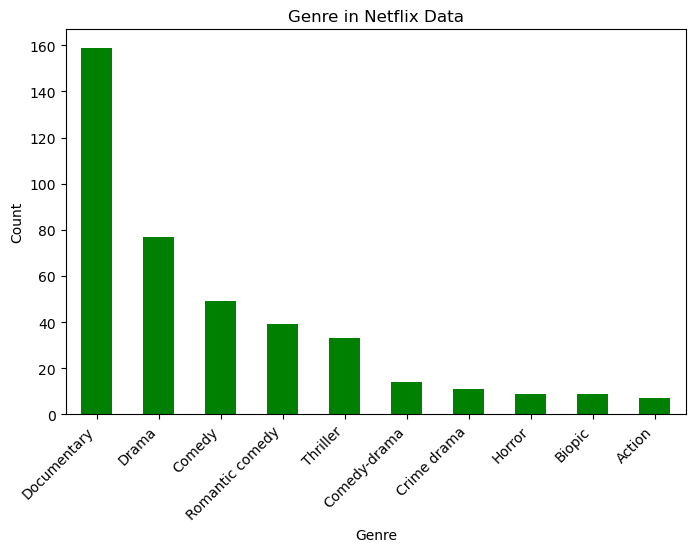

In [25]:
plt.figure(figsize=(8,5))  # Sets the size of the figure to 8x5 inches
df["Genre"].value_counts().head(10).plot(kind="bar", color="green")  # Plots a bar chart showing the top 10 most common genres in the DataFrame 'df', with bars colored in sky blue
plt.title("Genre in Netflix Data")  # Sets the title of the plot as "Genre in Netflix Data"
plt.xlabel("Genre")  # Sets the label for the x-axis as "Genre"
plt.ylabel("Count")  # Sets the label for the y-axis as "Count"
plt.xticks(rotation=45, ha="right")  # Rotates the x-axis tick labels by 45 degrees clockwise for better readability and aligns them to the right
plt.show()  # Displays the plot


## 
This code generates a bar plot to display the distribution of movie genres in a DataFrame called df. It selects the top 10 most common genres, counts their occurrences, and plots them as bars colored in sky blue. The plot includes a title ("Genre in Netflix Data"), labels for the x-axis ("Genre") and y-axis ("Count"), and rotates the x-axis tick labels by 45 degrees for better readability. Finally, it displays the plot.

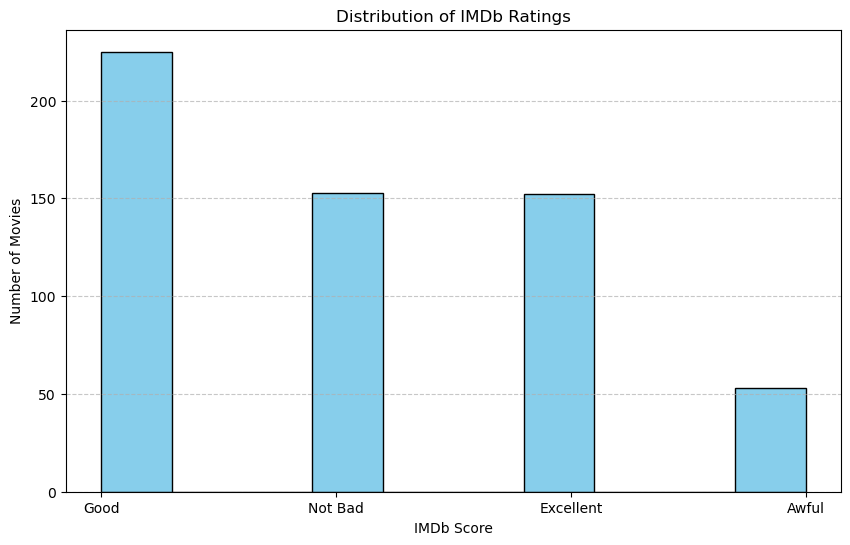

In [26]:
plt.figure(figsize=(10, 6))  # Sets the size of the figure to 10x6 inches
plt.hist(df['Imdb_Category'], bins=10, color='skyblue', edgecolor='black')  # Creates a histogram of IMDb categories with 10 bins, sky blue bars, and black edges
plt.title('Distribution of IMDb Ratings')  # Sets the title of the plot as "Distribution of IMDb Ratings"
plt.xlabel('IMDb Score')  # Sets the label for the x-axis as "IMDb Score"
plt.ylabel('Number of Movies')  # Sets the label for the y-axis as "Number of Movies"
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds a dashed grid to the y-axis with 0.7 transparency
plt.show()  # Displays the plot


## 
This code generates a pie chart to visualize the distribution of movie counts based on IMDb categories in a DataFrame called df. Each slice of the pie represents a different IMDb category, and the size of each slice corresponds to the proportion of movies in that category. The percentage labels display the exact percentage of movies in each category. The plot has a start angle of 140 degrees, which rotates the chart counterclockwise to start from that angle. Finally, it displays the plot.


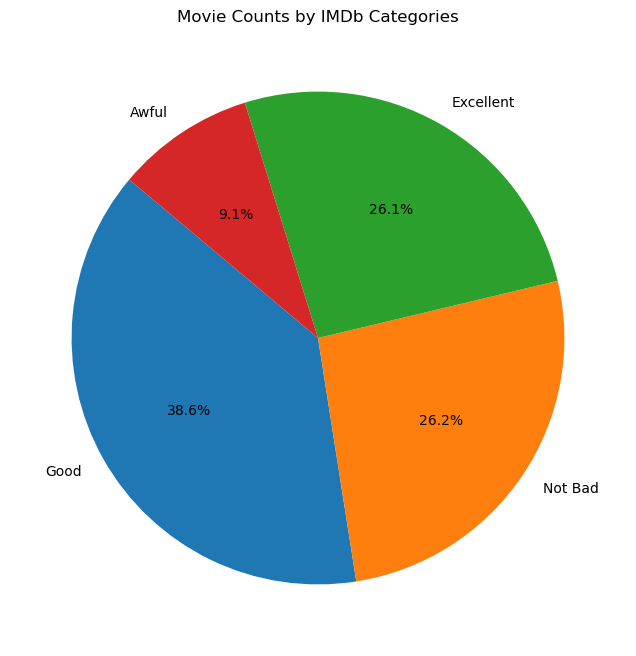

In [27]:
plt.figure(figsize=(8, 8))  # Sets the size of the figure to 8x8 inches
df['Imdb_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)  # Creates a pie chart showing the distribution of movie counts based on IMDb categories, with percentage labels and a start angle of 140 degrees
plt.title('Movie Counts by IMDb Categories')  # Sets the title of the plot as "Movie Counts by IMDb Categories"
plt.ylabel('')  # Removes the label for the y-axis
plt.show()  # Displays the plot


##
This code generates a histogram plot to visualize the distribution of IMDb scores in a DataFrame called df. The x-axis represents IMDb scores, divided into 20 bins, and the y-axis represents the frequency of scores falling into each bin. Additionally, a kernel density estimate (kde) is overlaid on the histogram to provide a smooth estimate of the probability density function of IMDb scores. The plot has a title ("Distribution of IMDb Scores") and labels for both the x-axis ("IMDb Score") and y-axis ("Frequency"). Finally, it displays the plot.

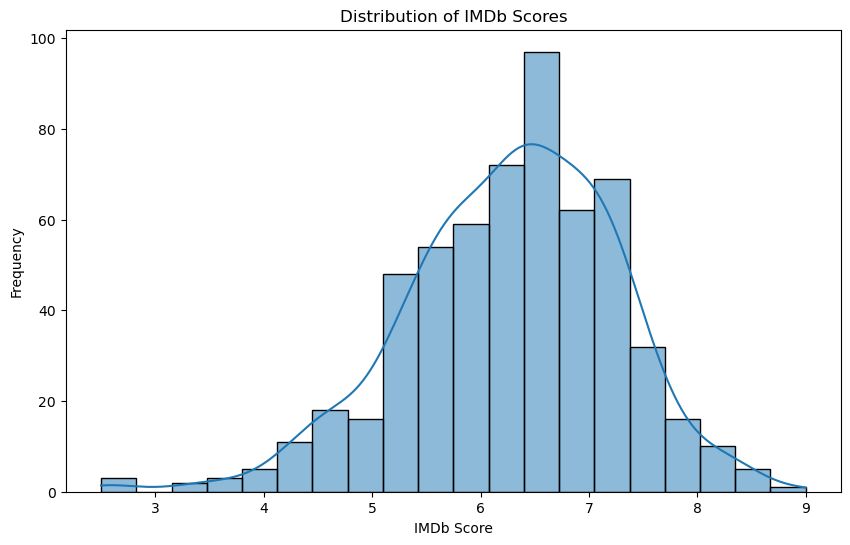

In [28]:
plt.figure(figsize=(10, 6))  # Sets the size of the figure to 10x6 inches
sns.histplot(data=df, x='Imdb_Score', bins=20, kde=True)  # Creates a histogram plot showing the distribution of IMDb scores in the DataFrame 'df', with 20 bins and a kernel density estimate (kde)
plt.title('Distribution of IMDb Scores')  # Sets the title of the plot as "Distribution of IMDb Scores"
plt.xlabel('IMDb Score')  # Sets the label for the x-axis as "IMDb Score"
plt.ylabel('Frequency')  # Sets the label for the y-axis as "Frequency"
plt.show()  # Displays the plot


##
This code generates a count plot to visualize the distribution of movies by language in a DataFrame called df. The x-axis represents different languages, and the height of each bar represents the number of movies in each language. The languages are sorted based on their frequency, with the top 10 most common languages displayed. The x-axis tick labels are rotated by 45 degrees for better readability. Finally, it displays the plot.

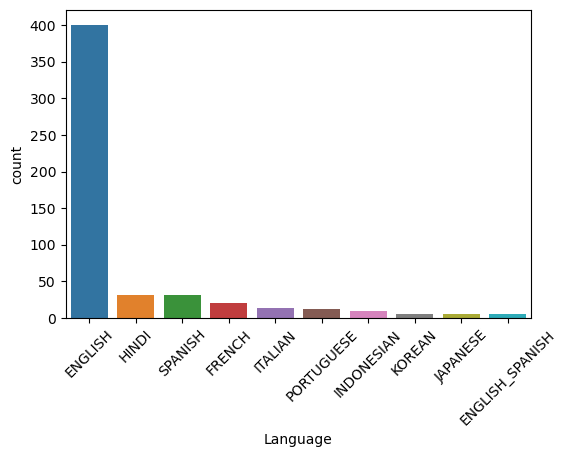

In [29]:
sorted_languages = df["Language"].value_counts().index[:10].tolist()  # Extracts the top 10 most common languages from the 'Language' column of the DataFrame 'df' and converts them to a list
sns.countplot(data=df, x="Language", order=sorted_languages)  # Creates a count plot to visualize the distribution of movies by language in the DataFrame 'df', with languages sorted based on their frequency
plt.xticks(rotation=45)  # Rotates the x-axis tick labels by 45 degrees for better readability
plt.show()  # Displays the plot


##
This code computes the top 20 most common genres in the DataFrame df and filters the DataFrame to include only movies with these genres. Then, it calculates the mean runtime for each genre. A violin plot is created to visualize the distribution of movie runtimes by genre, with the genres sorted based on their frequency. The plot has a title ("Distribution of Film Runtimes by Top 20 Movie Genres"), labels for both the x-axis ("Genres") and y-axis ("Film Runtime (Minutes)"), and rotated x-axis tick labels for better readability. Finally, it displays the plot.

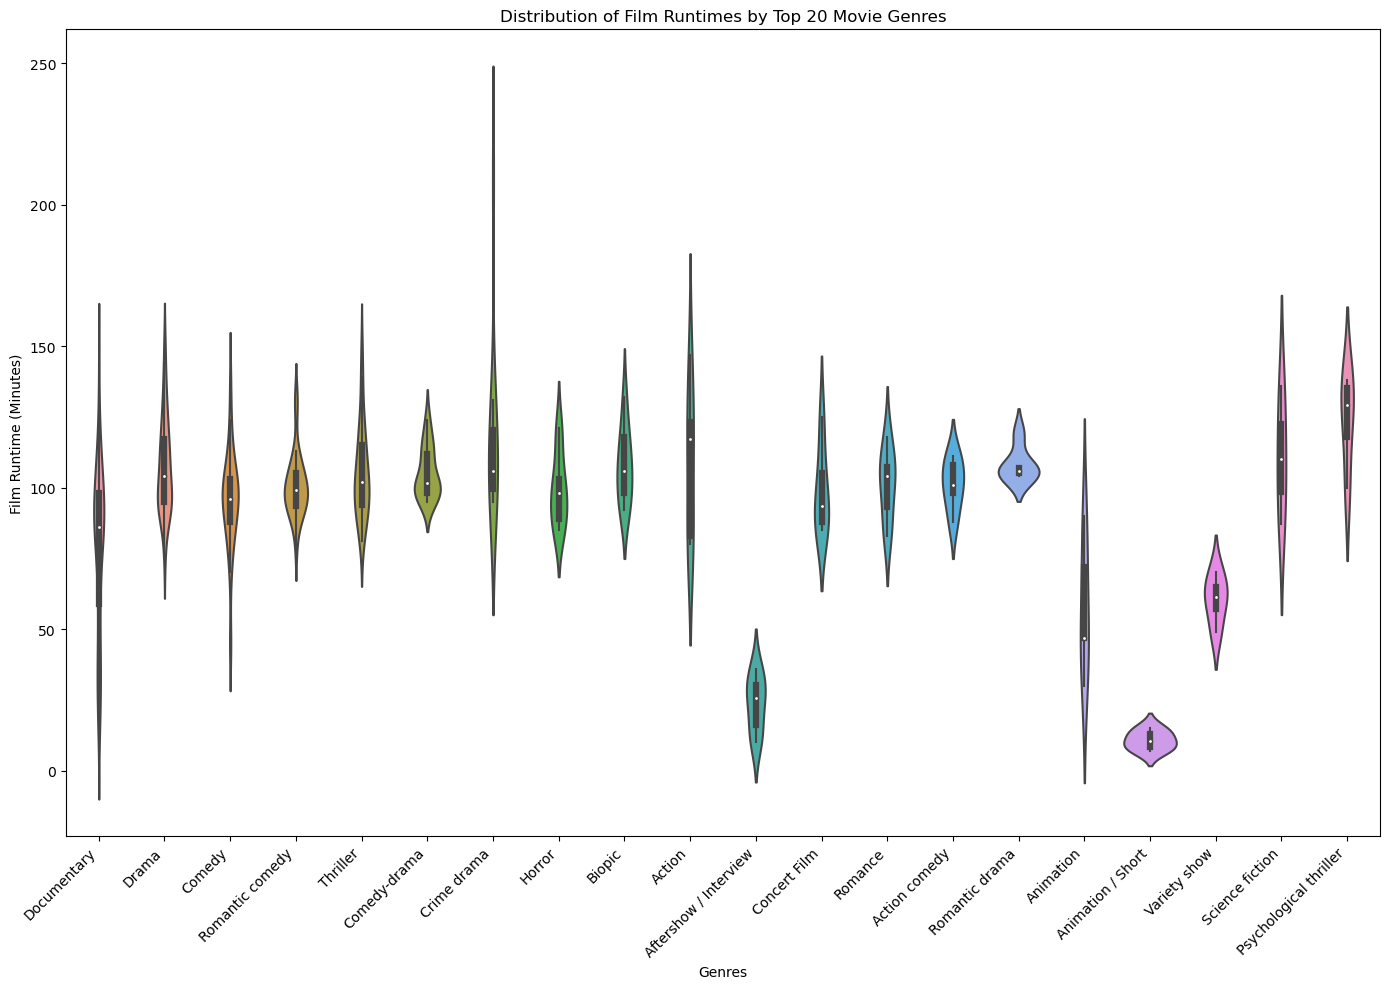

In [30]:
top_genres = df['Genre'].value_counts().head(20).index  # Extracts the top 20 most common genres from the 'Genre' column of the DataFrame 'df'
filtered_df = df[df['Genre'].isin(top_genres)]  # Filters the DataFrame 'df' to include only rows where the genre is one of the top 20 most common genres

genre_runtime = filtered_df.groupby('Genre')['Runtime'].mean().reset_index()  # Computes the mean runtime for each genre in the filtered DataFrame

plt.figure(figsize=(14, 10))  # Sets the size of the figure to 14x10 inches
sns.violinplot(data=filtered_df, x='Genre', y='Runtime', order=top_genres)  # Creates a violin plot to visualize the distribution of movie runtimes by genre, with genres sorted based on their frequency
plt.title('Distribution of Film Runtimes by Top 20 Movie Genres')  # Sets the title of the plot as "Distribution of Film Runtimes by Top 20 Movie Genres"
plt.xlabel('Genres')  # Sets the label for the x-axis as "Genres"
plt.ylabel('Film Runtime (Minutes)')  # Sets the label for the y-axis as "Film Runtime (Minutes)"
plt.xticks(rotation=45, ha='right')  # Rotates the x-axis tick labels by 45 degrees for better readability and aligns them to the right
plt.tight_layout()  # Adjusts the layout of the plot to prevent overlapping labels
plt.show()  # Displays the plot


##
This code calculates the movie with the highest IMDb score for each year and creates a line plot to visualize the trend of highest IMDb scores over the years. Each data point on the line plot represents the highest IMDb score for a specific year, and the title of the corresponding movie is annotated next to each point. The plot has a title ("Movies with the Highest IMDb Score by Year"), labels for both the x-axis ("Year") and y-axis ("Highest IMDb Score"), rotated x-axis tick labels for better readability, and grid lines for better visualization. Finally, it displays the plot.

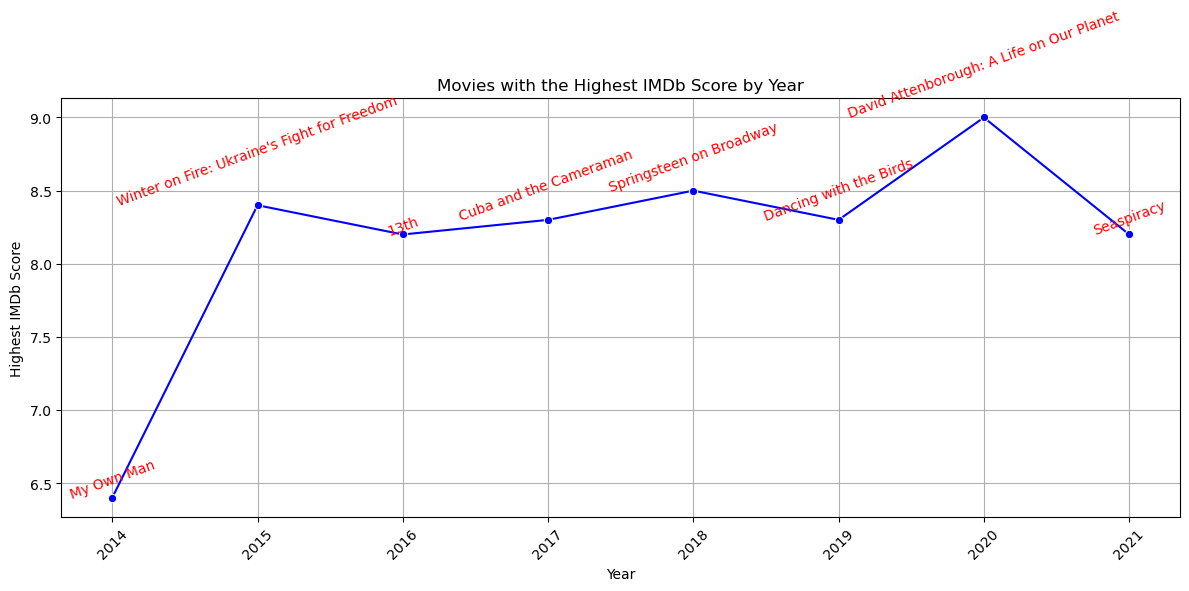

In [31]:
highest_imdb_by_year = df.groupby('Year').apply(lambda x: x.loc[x['Imdb_Score'].idxmax()]).reset_index(drop=True)
# Finds the movie with the highest IMDb score for each year and creates a DataFrame with these movies

plt.figure(figsize=(12, 6))  # Sets the size of the figure to 12x6 inches
sns.lineplot(data=highest_imdb_by_year, x='Year', y='Imdb_Score', marker='o', color='b')
# Creates a line plot to visualize the trend of highest IMDb scores over the years, with markers at data points and blue color

for index, row in highest_imdb_by_year.iterrows():
    plt.text(row['Year'], row['Imdb_Score'], row['Title'], color='red', ha="center", rotation=20)
# Adds text annotations to the plot, displaying the title of each movie with the highest IMDb score for each year

plt.title('Movies with the Highest IMDb Score by Year')  # Sets the title of the plot as "Movies with the Highest IMDb Score by Year"
plt.xlabel('Year')  # Sets the label for the x-axis as "Year"
plt.ylabel('Highest IMDb Score')  # Sets the label for the y-axis as "Highest IMDb Score"
plt.xticks(rotation=45)  # Rotates the x-axis tick labels by 45 degrees for better readability
plt.grid(True)  # Adds grid lines to the plot
plt.tight_layout()  # Adjusts the layout of the plot to prevent overlapping labels
plt.show()  # Displays the plot
